<p style="text-align:center">
    <a href="https://www.tec.ac.cr/" target="_blank">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/ITCR_LOGO.svg/1200px-ITCR_LOGO.svg.png" width="200" alt="UCenfotec Logo"  />
    </a>
</p>


# **CE-1105 Principios de Modelado en Ingeniería**
# Los principios SOLID

Prof. Marco Hernández V.
2024

Un algoritmo eficiente sienta las bases de una aplicación de software eficiente. Una vez que el algoritmo esté implementado, lo siguiente más importante en Ingeniería de Software sería garantizar que el software o la aplicación esté diseñado con las mejores prácticas de diseño y arquitectura. Muchos investigadores y expertos han definido varias mejores prácticas para el diseño eficiente de aplicaciones de software. Uno de los más populares son los principios de diseño populares con el acrónimo SOLID.


Deseamos que nuestro código cumpla con ciertas caracteristicas que son necesarias para que dicho código persista en el tiempo y pueda afrontar los cambios técnicos que podrían presentarse.

Algunos de estas caracteristicas son:
- Mantenibilidad
- Reusabilidad
- Legibilidad
- Extensibilidad


Uno de los más importantes y populares Principios de Diseño fueron presentados por Robert C Martin (Tío Bob). El tío Bob ha introducido varios principios de diseño y, entre ellos, los más populares son los cinco principios acrónimos de Principios de diseño SOLID que se centran principalmente en el diseño de software orientado a objetos.

Los principios SOLID facilitan el probar, dar mantenimiento y la legibilidad del código, así como un despliegue más ágil de software, mayor reusabilidad y escalabilidad del código y mejor depuración de errores.

**SOLID** es el acrónimo mnemónico que hace referencia a cada uno de los principios por sus siglas en inglés. Estas siglas son:

*`S`ingle Responsibility Principle* **(SRP)** o Principio de Responsabilidad Única

*`O`pen-Closed Principle* **(OCP)** o Principio de Abierto/Cerrado

*`L`iskov Substitution Principle* **(LSP)** o Principio de Substitución de Liskov

*`I`nterface Segregation Principle* **(ISP)** o Principio de Segregación de Interfaz

*`D`ependency Inversion Principle* **(DIP)** o Principio de Inversión de Dependencias

Estas mejores prácticas, cuando se consideran en el diseño de una aplicación de software orientada a objetos, tenderían a reducir la complejidad del código, reducirían el riesgo de roturas del código, mejorarían la comunicación entre diferentes entidades y harían que el código fuera más flexible, legible y manejable.

# **Single Responsibility Principle (SRP)**

---

El principio de responsabilidad única establece que una clase debe tener sólo una responsabilidad principal y no debe asumir otras responsabilidades.

- Una clase debe tener **una y solamente una** razón para cambiar.
- Una clase solamente tiene una responsabilidad
- La clase tiene la seguridad de atender sus tareas sin depender de otras clases


Robert C. Martin explica esto como "Una clase debería tener sólo una razón para cambiar".

In [ ]:
class Auto():
	def __init__(self):
		self.posicion = 0
		self.combustible = 100

	def mover(self, distancia):
		if self.combustible >= distancia / 2:
			self.posicion += distancia
			self.combustible -= distancia / 2
		else:
			print("No hay suficiente combustible")


	def agregar_combustible(self, cantidad):
		self.combustible += cantidad

	def obtener_combustible(self):
		return self.combustible

In [ ]:
miAuto = Auto()

#Muevo el auto 25 kilometros (significa que se le disminuye 25/2 = 12.5 de combustible
miAuto.mover(25)

#Pregunto por cantidad de combustible.  100 - 12.5 = 87.5
print(miAuto.obtener_combustible())

87.5


In [ ]:
#Vamos a mover el auto a 200 km.  (200/2 = 100)
#Necesita 100 de combustible, por tanto no se podrá mover el auto
miAuto.mover(200)

No hay suficiente combustible


In [ ]:
#Mejor voy a cargar más combustible
miAuto.agregar_combustible(200)

#Pregunto por la cantidad de combustible nuevamente
print(miAuto.obtener_combustible())


287.5


In [ ]:
#Ahora si puedo mover el auto
miAuto.mover(200)

#Pregunto cuanto combustible quedó 87.5 + 200 - (200/2) = 187.5
print(miAuto.obtener_combustible())

187.5


En esta clase se pueden observar dos funciones principales:
- Mover el auto
- Controlar y agregar combustible

Para poder cumplir con el **Principio de Responsabilidad Única** tendremos que separar dichas funcionalidades de la clase. Por tanto, nuestro código de clases quedará de la siguiente manera:


In [ ]:

class Auto():
	def __init__(self, tanque):
		self.posicion = 0
		self.tanque = tanque

	def mover(self, distancia):
		if self.tanque.obtener_combustible() >= distancia / 2:
			self.posicion += distancia
			self.tanque.usar_combustible(distancia / 2)
		else:
			print("No hay suficiente combustible")



class TanqueDeCombustible:
	def __init__(self):
		self.combustible = 100

	def agregar_combustible(self, cantidad):
		self.combustible += cantidad

	def obtener_combustible(self):
		return self.combustible

	def usar_combustible(self, cantidad):
		self.combustible -= cantidad

In [ ]:
tanque = TanqueDeCombustible()
miAuto = Auto(tanque)

In [ ]:
#Muevo el auto 25 kilometros (significa que se le disminuye 25/2 = 12.5 de combustible
miAuto.mover(25)

#Pregunto por cantidad de combustible.  100 - 12.5 = 87.5
print(miAuto.tanque.obtener_combustible())

87.5


In [ ]:
#Vamos a mover el auto a 200 km.  (200/2 = 100)
#Necesita 100 de combustible, por tanto no se podrá mover el auto
miAuto.mover(200)

No hay suficiente combustible


In [ ]:
#Mejor voy a cargar más combustible
miAuto.tanque.agregar_combustible(200)

#Pregunto por la cantidad de combustible nuevamente
print(miAuto.tanque.obtener_combustible())


487.5


In [ ]:
#Ahora si puedo mover el auto
miAuto.mover(200)

#Pregunto cuanto combustible quedó 87.5 + 200 - (200/2) = 187.5
print(miAuto.tanque.obtener_combustible())

387.5


De esta manera, se tienen dos clases, una para mover el auto y otra encargada o responsable del combustible.

Este modelo nos permite que las clases cumplan con las caracteristicas antes explicadas:
- Mantenibilidad
- Reusabilidad
- Legibilidad
- Extensibilidad

**Otro Ejemplo**

*   Recordemos que el Principio de Responsabilidad Única indica que una clase debería ser responsable de una única funcionalidad.
*   En otras palabras, la clase solo debería tener una única razón para cambiar.

 En el siguiente ejemplo sencillo se define una clase "pato" con 5 diferentes métodos.

In [ ]:
class Pato:
  def __init__(self, nombre):
    self.nombre = nombre

  def volar(self):
    print(f"{self.nombre} no vuela muy alto")

  def nadar(self):
    print(f"{self.nombre} nada en el lago y grazna")

  def hacer_sonido(self) -> str:
    return "Cuac"

  def saludar(self, pato2 ):
    print(f"{self.nombre}: {self.hacer_sonido()}, Hola {pato2.nombre}")

In [ ]:
pato1 = Pato("Paco")
pato2 = Pato("Lola")
pato1.saludar(pato2)

Paco: Cuac, Hola Lola


In [ ]:
pato2.saludar(pato1)

Lola: Cuac, Hola Paco


La funcionalidad principal de esta clase es definir un pato.  Si hay que cambiar esta definición, se cambiará esta clase.

El problema yace en el método saludar(), que se encarga de poder hablar con otros patos.
- Si se quisiera cambiar la funcionalidad de la conversación entre patos, se estaría cambiando también la clase Pato, es decir, habría una razón adicional para cambiar la clase.
- Las consecuencias de no respetar este principio pueden ser varias, como dificultar la depuración de errores, ya que varios errores apuntan al mismo sitio y las funcionalidades están más acopladas.


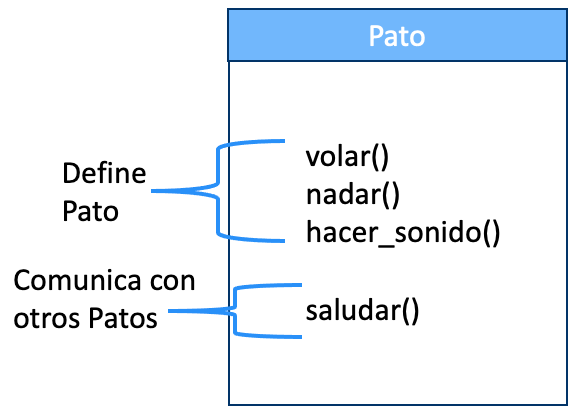

Para resolver este problema en el caso del ejemplo, se define una nueva clase Communicador que se encarga de toda la funcionalidad de comunicación.
Esta nueva clase permite entablar una conversación entre dos patos, donde estos se saludan. De esta manera, se ha cambiado el funcionamiento de la comunicación sin que la clase Duck se haya visto afectada.

In [ ]:
class Pato:

    def __init__(self, nombre):
        self.nombre = nombre

    def volar(self):
        print(f"{self.nombre} no vuela muy alto")

    def swim(self):
        print(f"{self.nombre} nada en el lago y grazna")

    def hacer_sonido(self) -> str:
        return "Cuac"

class Comunicador:

    def __init__(self, canal):
        self.canal = canal

    def comunicar(self, pato1 : Pato, pato2: Pato):
        oracion1 = f"{pato1.nombre}: {pato1.hacer_sonido()}, hola {pato2.nombre}"
        oracion2 = f"{pato2.nombre}: {pato2.hacer_sonido()}, hola {pato1.nombre}"
        conversacion = [oracion1, oracion2]
        print(*conversacion,
              f"(via {self.canal})",
              sep = '\n')

In [ ]:
pato1 = Pato("Paco")
pato2 = Pato("Lola")
pato1.hacer_sonido()
pato2.hacer_sonido()

'Cuac'

In [ ]:
charla = Comunicador("amigos")

In [ ]:
charla.comunicar(pato1, pato2)

Paco: Cuac, hola Lola
Lola: Cuac, hola Paco
(via amigos)


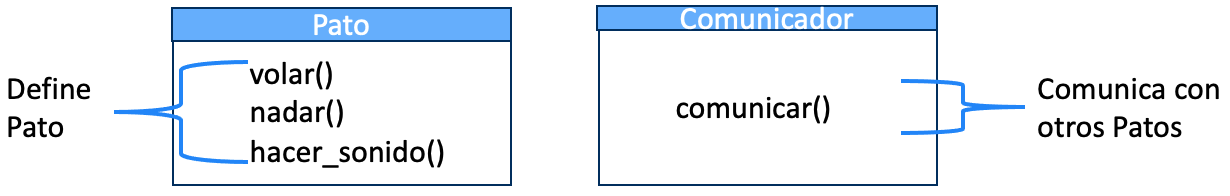

Lo que nos pide este principio es que cada clase debe tener **una unica responsabilidad**, por lo que si estamos programando una clase que se ocupa de diferentes cosas es conveniente partirla en 2 o más clases.
Con esto se consigue mayor mantenibilidad y se clarifica el código, haciéndolo más mantenible.

Muchas veces estamos tentados de programar demasiadas cosas en una misma clase, pero esto aumenta el acoplamiento de dos funcionalidades que pueden cambiar por razones diferentes o en momentos distintos.

**Ejemplo Final**


Tomemos el ejemplo de una aplicación de Directorio telefónico.

Estamos diseñando un directorio telefónico que contiene una clase de directorio telefónico que se supone que se encarga de la responsabilidad principal de mantener las entradas del directorio telefónico.

Por lo tanto, las operaciones que se espera que realice esta clase son agregar una nueva entrada (Nombre y Número de teléfono), eliminar una entrada existente, cambiar un Número de teléfono asignado a un Nombre de entidad y proporcionar una búsqueda que devuelva el Número de teléfono asignado a una Nombre de entidad particular.

Nuestra clase DirectorioTeléfono podría tener el siguiente aspecto:

In [ ]:
class DirectorioTelefonico:
  def __init__(self):
    self.directorio = {}

  def agregar_entrada(self, nombre, numero):
    self.directorio[nombre] = numero

  def eliminar_entrada(self, nombre):
    self.directorio.pop(nombre)

  def actualizar_entrada(self, nombre, numero):
    self.directorio[nombre] = numero

  def buscar_entrada(self, nombre):
    return self.directorio[nombre]

  def __str__(self):
    impresión = ""
    for key, value in self.directorio.items():
      impresión += f'{key} : {value} \n'
    return impresión


In [ ]:
miDirectorioTelefonico = DirectorioTelefonico()
miDirectorioTelefonico.agregar_entrada("Marco", 12345678)
miDirectorioTelefonico.agregar_entrada("Vivian", 67890123)
print(miDirectorioTelefonico)


Marco : 12345678 
Vivian : 67890123 



In [ ]:
miDirectorioTelefonico.eliminar_entrada("Marco")
miDirectorioTelefonico.agregar_entrada("Marco", 33333333)
miDirectorioTelefonico.actualizar_entrada("Vivian", 77777777)

print(miDirectorioTelefonico.buscar_entrada("Vivian"))

print(miDirectorioTelefonico)

77777777
Vivian : 77777777 
Marco : 33333333 



Hasta ahora, nuestra clase DirectorioTeléfonico luce bien y ha implementado exactamente las características esperadas.

Ahora digamos que hay dos requisitos más en el proyecto:
- conservar el contenido del directorio telefónico en una base de datos y
- transferir el contenido del directorio telefónico a un archivo.

Entonces, podemos agregar dos métodos más a la clase DirectorioTelefonico como se muestra a continuación:

In [ ]:
class DirectorioTelefonico:
  def __init__(self):
    self.directorio = {}

  def agregar_entrada(self, nombre, numero):
    self.directorio[nombre] = numero

  def eliminar_entrada(self, nombre):
    self.directorio.pop(nombre)

  def actualizar_entrada(self, nombre, numero):
    self.directorio[nombre] = numero

  def buscar_entrada(self, nombre):
    return self.directorio[nombre]

  def guardar_archivo(self, nombreArchivo, localizacion):
    #codigo para guardar datos a un archivo
    pass

  def persistencia_BaseDeDatos(self, detalles):
    #codigo para persistir el contenido hacia la base de datos
    pass


  def __str__(self):
    impresión = ""
    for key, value in self.directorio.items():
      impresión += f'{key} : {value} \n'
    return impresión


Ahora bien, aquí es donde rompimos el principio de diseño de responsabilidad única. Al agregar las funcionalidades de persistir en la base de datos y guardar en un archivo, le asignamos responsabilidades adicionales a la clase DirectorioTelefonico que no son su responsabilidad principal.

Esta clase ahora tiene características adicionales que pueden hacer que cambie. En el futuro, si existen requisitos relacionados con la conservación de los datos, estos pueden provocar cambios en la clase DirectorioTelefonico. Por lo tanto, DirectorioTelefonico es propenso a cambios por motivos que no son su responsabilidad principal.

El principio de responsabilidad única nos pide que no agreguemos responsabilidades adicionales a una clase para que no tengamos que modificar una clase a menos que haya un cambio en su responsabilidad principal.

Podemos manejar la situación actual al tener clases separadas que manejarían la persistencia de la base de datos y el almacenamiento en un archivo.

Podemos pasar el objeto DirectorioTelefonico a los objetos de esas clases y escribir cualquier característica adicional en esas clases.

Esto garantizaría que la clase DirectorioTelefonico tenga solo una razón para cambiar, es decir, cualquier cambio en su responsabilidad principal.

In [ ]:
#codigo para guardar datos a un archivo
class guardar_archivo:
  def __init__(self, objeto_guardar):
    pass

class persistencia_BaseDeDatos:
  #codigo para persistir el contenido hacia la base de datos
  def __init__(self,objeto_persistencia):
    pass


# **Open-Closed Principle (OCP)**

---

El Principio de Abierto/Cerrado indica que las clases deberían estar abiertas para su extensión, pero cerradas para su modificación. En otros términos, el código debería estar escrito de tal manera que, a la hora de añadir nuevas funcionalidades, no se deba modificar el código escrito previamente, que pueda estar siendo utilizado por otros usuarios.

- Los elementos de software tienen que estar abiertos para la extensión pero cerradas para la modificación.

- Deberiamos poder agregar nuevas funcionalidades sin la necesidad de cambiar el código fuente de la clase.



El principio abierto y cerrado fue conceptualizado por primera vez por Berterd Meyer en 1988. Robert C. Martin lo mencionó como "el principio más importante del diseño orientado a objetos".

Seguir este principio garantiza que una clase esté bien definida para hacer lo que se supone que debe hacer. Se pueden agregar más características creando nuevas entidades que extiendan las características de la clase existente y agreguen más características a sí misma. Previniendo así cambios frecuentes y triviales en una clase de bajo nivel bien establecida.

Para entender este principio, se creará una clase de Notificador que permitirá "notificar" utilizando varios medios, pero he ahí el problema si no se sigue un adecuado principio de diseño.


In [ ]:
class Notificador:
	def __init__(self, usuario, mensaje):
		self.usuario = usuario
		self.mensaje = mensaje

	def notificar(self):
		raise NotImplementedError


In [ ]:
miNotificador = Notificador("Marco", "Quedas notificado")


Sin en el método "notificar" se implementa el código necesario para notificar por medio de:
- correo electrónico
- WhatsApp
- Telegram
- SMS

entonces, para cada nuevo medio (extensibilidad) se tendría que modificar el código existente, lo cual va en contra de este principio.    Lo que se desea es permitir la extensibilidad sin alterar lo que funciona.

En este caso especifico, utilizaremos herencia para promocionar la extensibilidad sin alterar lo existente.


In [ ]:
class Notificador:
	def __init__(self, usuario, mensaje):
		self.usuario = usuario
		self.mensaje = mensaje


class NotificadorEmail(Notificador):
	def Notificar(self):
		print(f"Enviando mensaje por MAIL a {self.usuario.mail}")


class NotificadorSMS(Notificador):
	def Notificar(self):
		print(f"Enviando mensaje por SMS a {self.usuario.SMS}")


class NotificadorTelegram(Notificador):
	def Notificar(self):
		print(f"Enviando mensaje por Telegram a {self.usuario.Telegram}")


De esta manera tenemos un código más limpio y totalmente escalable.

**Otro Ejemplo**


Volvemos al segundo ejemplo del anterior principio.  En ese ejemplo, no se puede extender la funcionalidad de Communicador para añadir diferentes tipos de conversaciones sin modificar el método communicador().

Para cumplir con el segundo principio, se crea una clase ConversacionAbstracta que se encargará de definir diferentes tipos de conversaciones en sus subclases con implementaciones de hacer_conversacion(). De esta manera, el método communicar() de Communicador solo se regirá a llevar a cabo la comunicación a través de una canal y nunca se requerirá de su modificación (es un método final).

In [ ]:
from typing import final

class ConversacionAbstracta:

    def hacer_conversacion(self) -> list:
        pass

class SimpleConversacion(ConversacionAbstracta):

    def __init__(self, pato1: Pato, pato2: Pato):
        self.pato1 = pato1
        self.pato2 = pato2

    def hacer_conversacion(self) -> list:
        oracion1 = f"{self.pato1.nombre}: {self.pato1.hacer_sonido()}, hola {self.pato2.nombre}"
        oracion2 = f"{self.pato2.nombre}: {self.pato2.hacer_sonido()}, hola {self.pato1.nombre}"
        return [oracion1, oracion2]

class Communicador:

    def __init__(self, canal):
        self.canal = canal

    @final
    def comunicar(self, conversacion: ConversacionAbstracta):
        print(*conversacion.hacer_conversacion(),
              f"(via {self.canal})",
              sep = '\n')

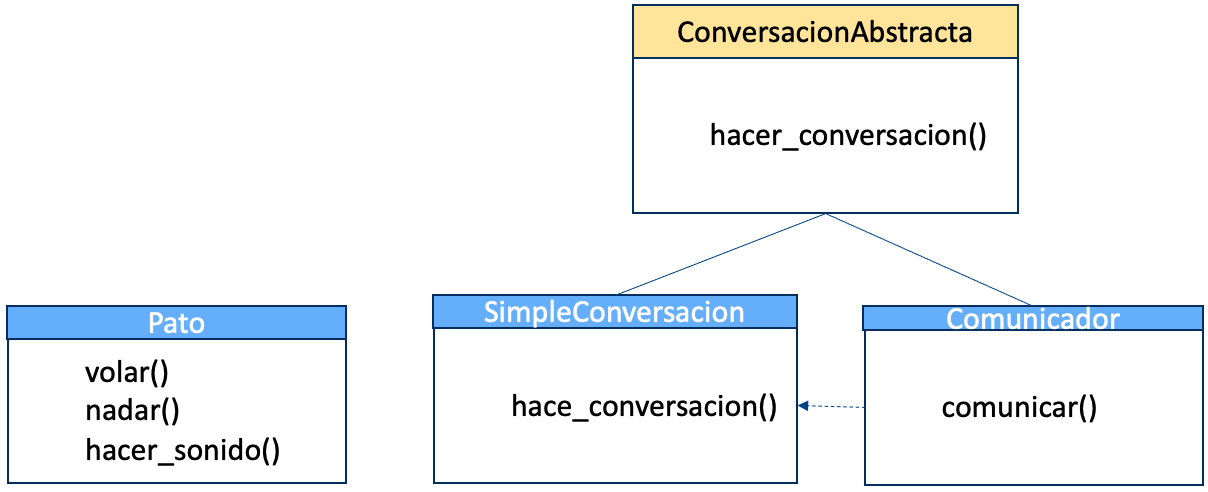

In [ ]:
charla = Comunicador("amigos")

In [ ]:
charla.comunicar(pato1, pato2)

Paco: Cuac, hola Lola
Lola: Cuac, hola Paco
(via amigos)


**Ejemplo Final**


Digamos que tenemos una aplicación para una tienda de ropa. Entre las diversas funciones del sistema, también hay una función para aplicar descuentos seleccionados según el tipo de prenda.

El siguiente ejemplo muestra una forma de implementar este requerimiento.

Tenemos una clase CalculadoraDescuento que tiene una propiedad para contener el tipo de prenda. Tiene una función que calcula el descuento según el tipo de prenda y devuelve el nuevo costo luego de deducir el monto del descuento.

In [ ]:
from enum import Enum

class Productos(Enum):
  camisa = 1
  enagua = 2
  pantalon = 3

class CalculadoraDescuento():
  def __init__(self, tipo_producto, costo):
    self.tipo_producto = tipo_producto
    self.costo = costo

  def obtiene_precio_descuento(self):
    if self.tipo_producto == Productos.camisa:
      return self.costo - (self.costo * 0.10)
    elif self.tipo_producto == Productos.enagua:
      return self.costo - (self.costo * 0.15)
    elif self.tipo_producto == Productos.pantalon:
      return self.costo - (self.costo * 0.25)


In [ ]:
dc_camisa = CalculadoraDescuento(Productos.camisa, 100)
print(dc_camisa.obtiene_precio_descuento())

dc_enagua = CalculadoraDescuento(Productos.enagua, 100)
print(dc_enagua.obtiene_precio_descuento())

dc_pantalon = CalculadoraDescuento(Productos.pantalon, 100)
print(dc_pantalon.obtiene_precio_descuento())


90.0
85.0
75.0


Este diseño viola el principio Abierto-Cerrado porque esta clase necesitará modificaciones si
  a). Se incluirá un nuevo tipo de vestimenta y
  b). Si el monto del descuento para cualquier prenda cambia.

Esta característica se puede implementar de manera eficiente como se muestra a continuación.

In [ ]:
from enum import Enum
from abc import ABCMeta, abstractmethod

class CalculadoraDescuento():

  @abstractmethod
  def obtiene_precio_descuento(self):
    pass

class CalculadoraDescuentoCamisa(CalculadoraDescuento):
  def __init__(self, costo):
    self.costo = costo

  def obtiene_precio_descuento(self):
    return self.costo - (self.costo * 0.10)

class CalculadoraDescuentoEnagua(CalculadoraDescuento):
  def __init__(self, costo):
    self.costo = costo

  def obtiene_precio_descuento(self):
    return self.costo - (self.costo * 0.15)


class CalculadoraDescuentoPantalon(CalculadoraDescuento):
  def __init__(self, costo):
    self.costo = costo

  def obtiene_precio_descuento(self):
    return self.costo - (self.costo * 0.25)


In [ ]:
dc_camisa = CalculadoraDescuentoCamisa(100)
print(dc_camisa.obtiene_precio_descuento())

dc_enagua = CalculadoraDescuentoEnagua(100)
print(dc_enagua.obtiene_precio_descuento())

dc_pantalon = CalculadoraDescuentoPantalon(100)
print(dc_pantalon.obtiene_precio_descuento())

90.0
85.0
75.0


Como se muestra en el ejemplo anterior, ahora tenemos una clase base CalculadoraDescuento muy simple que tiene un único método abstracto obtiene_precio_descuento.

Hemos creado nuevas clases para prendas de vestir que amplían la clase básica CalculadoraDescuento. Por lo tanto, ahora cada subclase necesitaría implementar la parte de descuento en sí misma. Al hacer esto, ahora hemos eliminado las restricciones anteriores que requerían modificaciones en la clase base.

Ahora, sin modificar la clase base, podemos agregar más prendas y cambiar el monto del descuento de prendas individuales según sea necesario.

# **Liskov Substitution Principle (LSP)**

---

El principio de sustitución de Liskov fue introducido por Barbara Liskov a través de una relación de subtipificación llamada Subtipificación de comportamiento fuerte.

Este principio establece que si una clase Sub es un subtipo de una clase Sup, entonces en el programa, los objetos de tipo Sup deben sustituirse fácilmente por objetos de tipo Sub sin necesidad de cambiar el programa.

El Principio de Substitución de Liskov establece que las clases deberían ser sustituibles por instancias de sus subclases.

Esto significa, que una clase que hereda de otra, debería poder hacer todo lo que la clase de quién hereda hace.


In [ ]:
class Ave:
	def volar(self):
		print ("Estoy volando")
		return

class Pinguino(Ave):
	def volar(self):
		print("No puedo volar")
		return

def hacer_volar(ave = Ave):
	return ave.volar()


hacer_volar(Pinguino())

No puedo volar


Acá hay un problema, pues un Pinguino es una Ave pero no puede volar, por tanto, una subclase no puede realizar todo lo que la clase hace.   

Para corregir esto, podemos reestructurar nuestro código de la siguiente manera:


In [ ]:
class Ave:
	pass

class AveVoladora(Ave):
  def volar(self):
   print("Estoy volando")
   return

class AveNoVoladora(Ave):
  pass



De esta manera, todas las subclases pueden hacer lo que su clase superior puede hacer.

**Otro Ejemplo**

Digamos que tenemos una clase base Auto que indicaría cuál es el tipo de automóvil. La clase Auto es heredada por la subclase AutoGasolina. De manera similar, la clase base Auto puede ser heredada por otras clases que pueden ampliar las funciones según se desee.

In [ ]:
class Auto():
  def __init__(self, tipo):
    self.tipo = tipo

class AutoGasolina(Auto):
  def __init__(self, tipo):
    self.tipo = tipo

In [ ]:
auto = Auto("SUV")
auto.propiedades = {"Color": "Rojo", "Engranaje": "Auto", "Capacidad": 6}
print(auto.propiedades)

{'Color': 'Rojo', 'Engranaje': 'Auto', 'Capacidad': 6}


In [ ]:
autogasolina = AutoGasolina("Sedan")
autogasolina.propiedades = {"Azul", "Manual", 4}
print(autogasolina.propiedades)


{'Azul', 'Manual', 4}


Como un parentesis.  ¿Sabias que en Python, por default, los atributos de un objeto pueden ser creados de forma dinámica en cualquier parte del código?   Estos se conocen como **atributos dinámicos**

    
    class Uses:

      def __init__(self, username, email):

        pass

py = User()

py.username = 'marco'

py.email = 'mhernandezvz@gmail.com'


Volviendo al ejemplo, como se puede ver aquí, no existe una especificación estándar para agregar propiedades del automóvil y queda en manos de los desarrolladores implementarla de la manera que más les convenga.

Un desarrollador puede implementarlo como un diccionario y otro puede implementarlo como una tupla y, por lo tanto, puede implementarse de múltiples maneras.

Hasta aquí no hay problema. Pero digamos que es necesario encontrar todos los autos de color rojo. Intentemos escribir una función que tome todos los autos e intentemos encontrar autos rojos en función de la implementación del objeto de la superclase “Auto”.

In [ ]:
def encontrar_autos_rojos(lista_autos):
  autos_rojos = 0
  for auto in lista_autos:
    if auto.propiedades['Color'] == "Rojo":
      autos_rojos += 1
  print(f'Numero de autos rojos = {autos_rojos} ')


In [ ]:
milista = [auto, autogasolina]

In [ ]:
encontrar_autos_rojos(milista)

TypeError: 'set' object is not subscriptable

Como podemos ver aquí, estamos intentando recorrer una lista de objetos de automóviles. Y aquí rompemos el principio de sustitución de Liskov ya que no podemos reemplazar los objetos de Super tipo Auto con objetos del Subtipo AutoGasolina en la función escrita para encontrar autos rojos.

Una mejor manera de implementar esto sería introducir métodos setter y getter en Superclass Auto mediante los cuales podemos configurar y obtener las propiedades de Auto sin dejar esa implementación en manos de desarrolladores individuales. De esta manera simplemente obtenemos las propiedades a través de un método de establecimiento y su implementación permanece interna a la Superclase.

Al hacer esto podemos cumplir con el Principio de sustitución de Liskov como se muestra a continuación:

In [ ]:
class Auto():
  def __init__(self, tipo):
    self.tipo = tipo
    self.propiedades = {}

  def set_propiedades(self, color, engranaje, capacidad):
    self.propiedades = {"Color": color, "Engranaje": engranaje, "Capacidad": capacidad}

  def get_propiedades(self):
    return self.propiedades

class AutoGasolina(Auto):
  def __init__(self, tipo):
    self.tipo = tipo
    self.propiedades = {}


In [ ]:
auto = Auto("SUV")
auto.set_propiedades("Rojo", "Auto", 6)
print(auto.get_propiedades())

{'Color': 'Rojo', 'Engranaje': 'Auto', 'Capacidad': 6}


In [ ]:
autogasolina = AutoGasolina("Sedan")
autogasolina.set_propiedades("Azul", "Manual", 4)
print(autogasolina.get_propiedades())

{'Color': 'Azul', 'Engranaje': 'Manual', 'Capacidad': 4}


In [ ]:
def encontrar_autos_rojos(lista_autos):
  autos_rojos = 0
  for auto in lista_autos:
    if auto.get_propiedades()['Color'] == "Rojo":
      autos_rojos += 1
  print(f'Numero de autos rojos = {autos_rojos} ')

In [ ]:
milista = [auto, autogasolina]

In [ ]:
encontrar_autos_rojos(milista)

Numero de autos rojos = 1 


# **Interface Segregation Principle (ISP)**

---

El Principio de Segregación de Interfaz establece que "Ningún cliente debe verse obligado a depender de métodos que no utiliza".  NO se puede obligar a usar cosas que no debe usar.

El principio de segregación de interfaces sugiere crear interfaces más pequeñas conocidas como "interfaces de roles" en lugar de una interfaz grande que consta de múltiples métodos. Al segregar los métodos basados en roles en interfaces de roles más pequeñas, los clientes dependerían sólo de los métodos que son relevantes para ellos.


Vamos a crear una interfaz lo cual obligará la implementación de los métodos en todas las clases que hereden de ella.

In [ ]:
from abc import ABC, abstractmethod

class Trabajador(ABC):

	@abstractmethod
	def comer(self):
		pass

	@abstractmethod
	def trabajar(self):
		pass

	@abstractmethod
	def dormir(self):
		pass


Dada la anterior interfaz, creamos una clase de Humano.

In [ ]:
class Humano(Trabajador):
	def comer(self):
		print("El humano está comiendo")


	def trabajar(self):
		print("El humano está trabajando")


	def dormir(self):
		print("El humano está durmiendo")

Dada la interfaz, hacemos una clase Robot.  Pero solo queremos permitir que el robot trabaje (hasta ahora no pueden comer o dormir como tal), por tanto, solamente implementamos el método "trabajar".

In [ ]:
class Robot(Trabajador):

	def trabajar(self):
		print("El humano está trabajando")


Ahora instanciamos un objeto de humano.

In [ ]:
mihumano = Humano()

mihumano.comer()


El humano está comiendo


Ahora instanciamos un objeto de Robot

In [ ]:
robot = Robot()

TypeError: Can't instantiate abstract class Robot with abstract methods comer, dormir

No envia un error, indicando que no hay una implementación a métodos que obligaroriamente tienen que existir.

Para corregir este error, tendriamos que modificar la clase de la siguiente manera:


In [ ]:
class Robot(Trabajador):
  def comer(self):
    pass

  def trabajar(self):
    print("El humano está trabajando")

  def dormir(self):
    pass

Pero esto es incorrecto, pues estamos colocando código "no activo", pues los robots no comen ni duermen, por tanto dichos métodos no tienen implementación.

Para poder corregir esto, se debe segmentar la interfaz en más interfaces más pequeñas.

Curiosamente, en este caso, para solucionar este problema también debemos aplicar el primer principio.


In [ ]:
from abc import ABC, abstractmethod

class Trabajador(ABC):
	@abstractmethod
	def trabajar(self):
		pass

class Comelon(ABC):
	@abstractmethod
	def comer(self):
		pass

class Durmiente(ABC):
	@abstractmethod
	def dormir(self):
		pass

Ahora redefinimos la clase Humano, pero esta vez heredará de tres interfaces.  

In [ ]:
class Humano(Trabajador, Comelon, Durmiente):
	def comer(self):
		print("El humano está comiendo")


	def trabajar(self):
		print("El humano está trabajando")


	def dormir(self):
		print("El humano está durmiendo")

Además redefinimos la clase Robot, pero heredando unicamente de la interfaz Trabajador.

In [ ]:
class Robot(Trabajador):
  def trabajar(self):
    print("El robot está trabajando")


y de esta manera ya podemos instanciar sin ningún problema tal y como deseamos.

In [ ]:
robot = Robot()

mihumano = Humano()

**Otro ejemplo**

Digamos que estamos diseñando una aplicación para diferentes dispositivos de comunicación. Identificamos que un dispositivo de comunicación es un dispositivo que tendría una o varias de estas características
- hacer llamadas,
- enviar SMS y
- navegar por Internet.
    
Entonces, creamos una interfaz llamada **DispositivoComunicacion** y agregamos los métodos abstractos respectivos para cada una de estas características, de modo que cualquier clase de implementación necesite implementar estos métodos.

Luego creamos una clase **Celular** usando la interfaz DispositivoComunicacion e implementamos las funcionalidades de los métodos abstractos. Hasta aquí todo está bien.


Ahora digamos que queremos implementar un teléfono fijo tradicional. Este también es un dispositivo de comunicación, por lo que creamos una nueva clase TelefonoFijo usando la misma interfaz DispositivoComunicacion. Aquí es exactamente cuando nos enfrentamos al problema debido a una gran interfaz DispositivoComunicación que creamos.

En la clase TelefonoFijo, implementamos el método hacerLlamadas(), pero como también heredamos los métodos abstractos enviarSms() y navegarInternet() tenemos que proporcionar una implementación de estos dos métodos abstractos también en la clase TelefonoFijo incluso si no son aplicables a Esta clase de teléfono fijo. Podemos lanzar una excepción o simplemente escribir un pase en la implementación, pero aún necesitamos proporcionar una implementación.


In [ ]:
#Creamos la interfaz
from abc import ABC, abstractmethod

class DispositivoComunicacion():
  @abstractmethod
  def hacer_llamadas():
    pass

  @abstractmethod
  def enviar_sms():
    pass

  @abstractmethod
  def navegar_internet():
    pass


#Creamos las clases

class Celular(DispositivoComunicacion):
  def hacer_llamadas():
    #implementacion
    pass

  def enviar_sms():
    #implementacion
    pass

  def navegar_internet():
    #implementacion
    pass



class TelefonoFijo(DispositivoComunicacion):
  def hacer_llamadas():
    #implementacion
    pass

  def enviar_sms():
    #implementacion
    pass

  def navegar_internet():
    #implementacion
    pass

Esto se puede corregir siguiendo el principio de segregación de interfaz como se muestra en el siguiente ejemplo.

En lugar de crear una interfaz grande, creamos interfaces de roles más pequeñas para cada método. Las clases respectivas solo usarían interfaces relacionadas.

In [ ]:
#Creamos la interfaz
from abc import ABC, abstractmethod

class DispositivoLlamada():
  @abstractmethod
  def hacer_llamadas():
    pass

class DispositivoMensajes():
  @abstractmethod
  def enviar_sms():
    pass

class DispositivoNavegacion():
  @abstractmethod
  def navegar_internet():
    pass


#Creamos las clases

class Celular(DispositivoLlamada, DispositivoMensajes, DispositivoNavegacion):
  def hacer_llamadas():
    #implementacion
    pass

  def enviar_sms():
    #implementacion
    pass

  def navegar_internet():
    #implementacion
    pass



class TelefonoFijo(DispositivoLlamada):
  def hacer_llamadas():
    #implementacion
    pass


# **Dependency Inversion Principle (DIP)**

---

El Principio de Inversión de Dependencia establece que:

- a). El módulo de alto nivel no debe depender de módulos de bajo nivel. Ambos deberían depender de abstracciones.

- b). Las abstracciones no deberían depender de los detalles. Los detalles deberían depender de abstracciones.

Si su código sigue el principio abierto-cerrado y el principio de sustitución de Liskov, entonces estará implícitamente alineado para cumplir también con el principio de inversión de dependencia.

Siguiendo el principio abierto-cerrado, crea interfaces que pueden usarse para proporcionar diferentes implementaciones de alto nivel. Al seguir el principio de sustitución de Liskov, se asegura de poder reemplazar los objetos de clase de bajo nivel con objetos de clase de alto nivel sin causar ningún efecto adverso en la aplicación. Por lo tanto, al seguir estos dos principios, se asegura de que sus clases de alto nivel y clases de bajo nivel dependan de las interfaces. Por lo tanto, seguiría implícitamente el principio de inversión de dependencia.

Esto nos permite ser más flexibles, nos permite realizar cambios a bajo nivel que no obligan a realizar cambios en alto nivel.


Vamos a realizar un corrector ortográfico que hará uso de un Diccionario.

In [ ]:
class Diccionario:
	def verificar_palabra(self, palabra):
		#Lógica para verificar palabras
		pass

class CorrectorOrtografico:
	def __init__(self):
		self.diccionario = Diccionario()

	def corregir_texto(self, texto):
		#Usamos el diccionario para corregir el texto
		pass


Como puede observar, la clase principal del corrector es la clase "CorrectorOrtografico" pero esta, se encuentra altamente dependiente al Diccionario, por tanto, cualquier variable o método de Diccionario tendrá sus repercusiones en la clase principal de CorrectorOrtografico.

Si quisieramos cambiar la forma de verificar las palabras y usar un mecanismo de internet, o un servicio distinto, se tendría que cambiar la clase "CorrectorOrtografico" pues esta solamente usa el diccionario.


Se puede solucionar de la siguiente manera:


In [ ]:
from abc import ABC, abstractmethod

class VerificadorOrtografico(ABC):
	@abstractmethod
	def verificar_palabra(self, palabra):
		pass


class Diccionario(VerificadorOrtografico):
	def verificar_palabra(self, palabra):
		#Lógica para verificar palabras si esta en el diccionario
		pass

class CorrectorOrtografico:
	def __init__(self, verificador):
		self.verificador = verificador

	def corregir_texto(self, texto):
		#Usamos el diccionario para corregir el texto
		pass



Ahora CorrectorOrtografico esta dependiendo de una abstracción por tanto es mucho más flexible.

De la manera anterior, aún podemos continuar usando el diccionario sin ningún problema, pero además nos ofrece la flexibilidad para utilizar otros mecanismos de verificador, por ejemplo un servicio online.



In [ ]:
from abc import ABC, abstractmethod

class VerificadorOrtografico(ABC):
	@abstractmethod
	def verificar_palabra(self, palabra):
		pass


class Diccionario(VerificadorOrtografico):
	def verificar_palabra(self, palabra):
		#Lógica para verificar palabras si esta en el diccionario
		pass


class ServicioOnline(VerificadorOrtografico):
	def verificar_palabra(self, palabra):
		#Lógica para verificar palabras desde el servicio web
		pass


class CorrectorOrtografico:
	def __init__(self, verificador):
		self.verificador = verificador

	def corregir_texto(self, texto):
		#Usamos el diccionario para corregir el texto
		pass



Así de esta manera, ya no existe una dependencia de diccionario, pues podemos "parametrizar" el verificador.   Podemos continuar con:


In [ ]:
corrector = CorrectorOrtografico(Diccionario)



Pero si queremos utilizar otro mecanismo, gracias a la interfaz podemos hacerlo con el minimo cambio.


In [ ]:
corrector = CorrectorOrtografico(ServicioOnline)

Como verificador es una clase abstracta se tienen todos los métodos que se necesitan ahí mismo, los cuales se podrán continuar usando, métodos tales como buscar_similares(), corregir_ortografia(), agregar_acento(), etc.

In [ ]:
from abc import ABC, abstractmethod


class PaymentMethod(ABC):
    @abstractmethod
    def process_payment(self, payment):
        pass


class PaymentProcessor:
    def __init__(self, payment_method):
        self.payment_method = payment_method

    def process_payment(self, payment):
        self.payment_method.process_payment(payment)


class CreditCardPayment(PaymentMethod):
    def process_payment(self, payment):
        # Code to charge credit card


class PayPalPayment(PaymentMethod):
    def process_payment(self, payment):
        # Code to process PayPal payment

**Otro Ejemplo**

Como se muestra en el siguiente código, tenemos una clase Estudiante que usamos para crear entidades Estudiante y una clase Membresias que contiene membresías de diferentes estudiantes en diferentes equipos.

Ahora definimos un Análisis de clase de alto nivel donde necesitamos conocer a todos los estudiantes que pertenecen al equipo TEC.

In [2]:

from enum import Enum
from abc import ABC, abstractmethod

class Equipo(Enum):
  EQUIPO_TEC = 1
  EQUIPO_UCR = 2
  EQUIPO_UNA = 3

class Estudiante:
  def __init__(self, nombre):
    self.nombre = nombre

class MembresiaEquipos():  # TeamMemberships
  def __init__(self):
    self.Equipos = []   #team_memberships

  def agregar_miembro(self, estudiante, equipo):
    self.Equipos.append((estudiante, equipo))

class Analisis():
  def __init__(self, membresia_estudiante_equipo):
    membresia = membresia_estudiante_equipo.Equipos
    for miembros in membresia:
      if miembros[1] == Equipo.EQUIPO_TEC:
        print(f'{miembros[0].nombre} esta en el equipo TEC')


In [3]:
estudiante1 = Estudiante('Ignacio')
estudiante2 = Estudiante('Jennifer')
estudiante3 = Estudiante('Marco')

In [4]:
equiposUniversitarios = MembresiaEquipos()
equiposUniversitarios.agregar_miembro(estudiante1, Equipo.EQUIPO_UCR)
equiposUniversitarios.agregar_miembro(estudiante2, Equipo.EQUIPO_UNA)
equiposUniversitarios.agregar_miembro(estudiante3, Equipo.EQUIPO_TEC)


In [5]:
Analisis(equiposUniversitarios)

Marco esta en el equipo TEC


Como podemos ver en esta implementación, estamos usando directamente membresia_estudiante_equipo.Equipos en nuestro Análisis de clase de alto nivel y estamos usando la implementación de esta lista directamente en la clase de alto nivel.

Por ahora, esto está bien, pero imagina una situación en la que necesitemos cambiar esta implementación de lista a otra cosa. En ese caso, nuestro análisis de clase de alto nivel se rompería, ya que depende de los detalles de implementación de las membresías de equipo de clase de bajo nivel.

Ahora vea el siguiente ejemplo donde cambiamos esta implementación y la hacemos cumplir con el principio de inversión de dependencia.

In [2]:
from enum import Enum
from abc import ABC, abstractmethod

class Equipo(Enum):
  EQUIPO_TEC = 1
  EQUIPO_UCR = 2
  EQUIPO_UNA = 3

class Estudiante:
  def __init__(self, nombre):
    self.nombre = nombre

class BuscarMiembros(ABC):
  @abstractmethod
  def encontrar_estudiantes_equipo(self, equipo):
    pass

class MembresiaEquipos(BuscarMiembros):  # TeamMemberships
  def __init__(self):
    self.Equipos = []   #team_memberships

  def agregar_miembro(self, estudiante, equipo):
    self.Equipos.append((estudiante, equipo))

  def encontrar_estudiantes_equipo(self, equipo):
    for miembros in self.Equipos:
      if miembros[1] == equipo:
        yield miembros[0].nombre

class Analisis():
  def __init__(self, buscar_miembro_equipo):
    for estudiante in buscar_miembro_equipo.encontrar_estudiantes_equipo(Equipo.EQUIPO_TEC):
        print(f'{estudiante} esta en el equipo TEC')




In [3]:
estudiante1 = Estudiante('Ignacio')
estudiante2 = Estudiante('Jennifer')
estudiante3 = Estudiante('Marco')

In [4]:
equiposUniversitarios = MembresiaEquipos()
equiposUniversitarios.agregar_miembro(estudiante1, Equipo.EQUIPO_UCR)
equiposUniversitarios.agregar_miembro(estudiante2, Equipo.EQUIPO_UNA)
equiposUniversitarios.agregar_miembro(estudiante3, Equipo.EQUIPO_TEC)


In [5]:
Analisis(equiposUniversitarios)

Marco esta en el equipo TEC


# **Resumen**

---

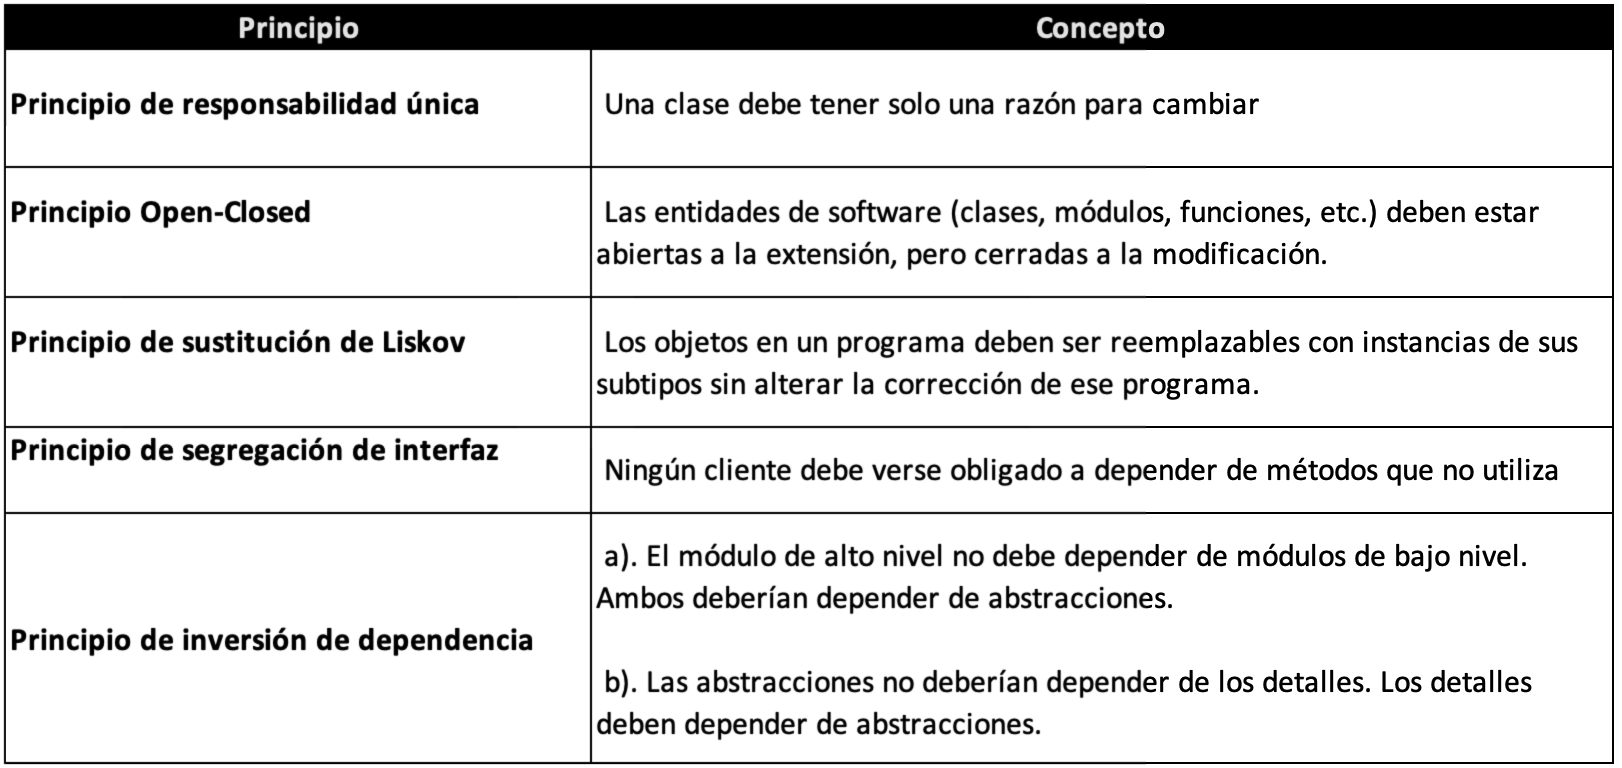

# **Taller**

---

Desarrolle un ejemplo suyo (no copiado de otro lado) en el cual presente la aplicación de todos y cada uno de los principios de diseño **SOLID**.     

Puede ser un solo ejemplo aplicando todo los conceptos, o bien, un ejemplo distinto para cada principio.

Lo importante es que cada ejemplo presente lo siguiente:
- Código SIN aplicar el respectivo principio
- Código APLICANDO el respectivo principio
- Justificación del problema sin aplicar el principio, y justificación de lo en la aplicación del principio.



Los principios a utilizar son:

*`S`ingle Responsibility Principle* **(SRP)** o Principio de Responsabilidad Única

*`O`pen-Closed Principle* **(OCP)** o Principio de Abierto/Cerrado

*`L`iskov Substitution Principle* **(LSP)** o Principio de Substitución de Liskov

*`I`nterface Segregation Principle* **(ISP)** o Principio de Segregación de Interfaz

*`D`ependency Inversion Principle* **(DIP)** o Principio de Inversión de Dependencias